# Problem 1

In [272]:
import numpy as np

card_deck = []
for rank in range(13):
    for suit in range(4):
        card_deck.append({'rank':rank, 'suit':suit})
        
def is_straight(hand):
    hand_ranks = [x['rank'] for x in hand]
    hand_suits = [x['suit'] for x in hand]
    consecutive = ((max(hand_ranks) - min(hand_ranks)) == 4) and (len(np.unique(hand_ranks))==5)
    straight_flush = len(np.unique(hand_suits)) == 1
    return consecutive and not straight_flush

def one_experiment():
    hand = np.random.choice(card_deck, 5, replace=False)
    return is_straight(hand)

results = []
for i in range(10000):
    results.append(one_experiment())
print("sample probability for straight: ", np.mean(results))

print("copies of simulation needed to achieve accuracy of 0.0001: ")

sample probability for straight:  0.0038
copies of simulation needed to achieve accuracy of 0.0001: 


In [174]:
%%latex
$\frac{1}{\sqrt{n}}$ $\leq 0.0001 \\ n \geq 10^{8}$

<IPython.core.display.Latex object>

# Problem 2.i

In [270]:
from scipy.stats import poisson
import math
def generate_sample():
    return poisson.rvs(mu = 2, size = 10)
results = []
for i in range(100):
    results.append(sum(generate_sample()))
mean = np.mean(results)

print("sample mean for E_i: ", mean)

sample_variances = []
for E_i in results:
    sample_variances.append(math.pow(E_i - mean, 2))
print("sample variance for E_i:", sum(sample_variances)/100)

sample mean for E_i:  19.97
sample variance for E_i: 23.1691


# Problem 2.ii

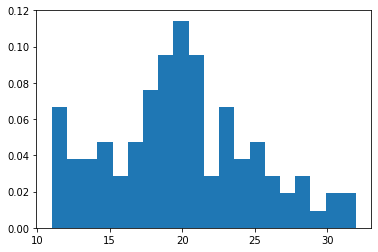

In [271]:
import matplotlib.pyplot as plt
_ = plt.hist(results, bins=20, density=True)

# Problem 2.iii

percentage of inter-arrivals longer than 1 minute:  13.838862559241708
math.exp(-2):  0.1353352832366127


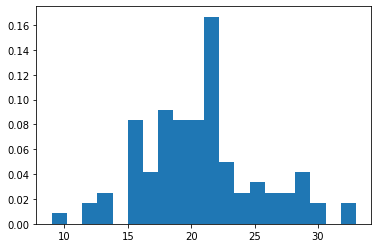

In [269]:
from scipy.stats import expon

def get_an_arrival():
    x = expon.rvs(scale = 1/2, size = 1)
    #print(x)
    return x

def get_a_day():
    day = []
    while(sum(day) <= 10):
        day.append(get_an_arrival())
    #print(day)
    return day

r = []
for i in range(100):
    for interarrival in get_a_day():
        if interarrival > 1:
            r.append(True)
        else:
            r.append(False)
print("percentage of inter-arrivals longer than 1 minute: ", np.mean(r)*100)
print("math.exp(-2): ", math.exp(-2))

_ = plt.hist(results, bins=20, density=True)

# Problem 2.iv

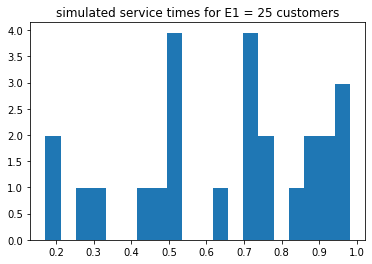

expectation a:  0.6526650764257826
standard devioation:  0.2437791560076194

percentage of simulated service times shorter than a+2σ/√E1:  64.0 %







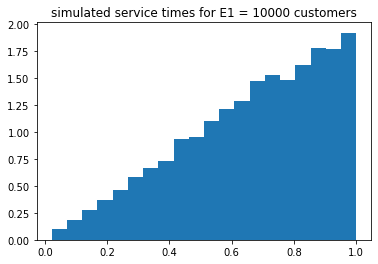

expectation a:  0.6663914469264142
standard devioation:  0.23282921316434188

percentage of simulated service times shorter than a+2σ/√E1:  45.11 %





standard normal cdf for x = 2:  97.72498680518208


In [267]:
e1 = sum(generate_sample())
#e1 = 10000

def inverse_cdf(x):
    return math.sqrt(x)
vectorize_inverse_cdf = np.vectorize(inverse_cdf)

def run(e1):
    U = np.random.uniform(size=e1)
    simulated_times = vectorize_inverse_cdf(U)
    plt.title('simulated service times for E1 = ' + str(e1) + ' customers')
    _ = plt.hist(simulated_times, bins=20, density=True)
    plt.show()
    a = sum(simulated_times)/e1
    print("expectation a: ", a)


    deviations = []
    for service_time in simulated_times:
        deviations.append(math.pow(service_time - a, 2))
    std_dev = math.sqrt(sum(deviations)/e1)
    print("standard devioation: ", std_dev)


    shorter = []
    print()
    val = a + 2*std_dev/math.sqrt(e1)
    for service_time in simulated_times:
        if service_time < val:
            shorter.append(True)
        else:
            shorter.append(False)
    print("percentage of simulated service times shorter than a+2σ/√E1: ", np.mean(shorter)*100, "%")
    for i in range(5):
        print()
        
run(sum(generate_sample()))
run(10000)

from scipy.stats import norm
print("standard normal cdf for x = 2: ", norm.cdf(2)*100)

In [273]:
#   I don't know how to compare the percentage of the simulated service times that are shorter than a+2σ/√E1
#   to the percentage of values in the standard normal distribution that are <= 2. 

#   When I computed that percentage using E1 = 25 simulated service times, I got 64%. When I computed the percentage for 
#   10000 simulated service times, I got ~45%. 
#   I must have gone wrong somewhere, because I don't know how to compare it to the 97.7% from the normal cdf.